# Logistic Regression (Classification)

---

Generate dataset using make_classification function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters
n_informative = 5
class_sep = 2
random_state = 42
Explore and analyse raw data.
Do preprocessing for classification.
Split your dataset into train and test test (0.7 for train and 0.3 for test).
Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

### 1. Main libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2. Generate dataset using make_classification function in the sklearn. Convert it into pandas dataframe.

In [22]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5, n_classes=2, class_sep=2, random_state=42)
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df.info()
y_df.info()

In [ ]:
X_df.head()

In [ ]:
y_df.head()

In [ ]:
X_df.describe()

In [ ]:
y_df.describe()

### 3. Check duplicate values and missing data

In [ ]:
X_df.duplicated().sum()
X_df.isna().sum()

### 4. Visualize data for each feature (pairplot,distplot)

In [ ]:
sns.displot(X_df)

In [ ]:
sns.distplot(X_df)

In [ ]:
sns.pairplot(X_df)

### 5. Draw corrolation matrix and drop correlated features (check correlation matrix)

In [ ]:
corr = X_df.corr() # You must only change this line each time.

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
X_df_drop = X_df.drop([2, 6], axis=1)



corr = X_df_drop.corr() # You must only change this line each time.

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### 6. Handle outliers (you can use IsolationForest)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_df_drop, y_df, test_size=0.5, random_state=2, stratify=y_df)
# define outlier detection model
model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=6, random_state=42)
# fit
model.fit(X_train)


X_p = model.predict(X_train)
X_p_2 = model.predict(X_test)
# X_p_O = model.predict(outlier)


X_7 = model.decision_function(X_df_drop)
X_8 = model.predict(X_df_drop)

X_train

In [ ]:
X_df_drop['scores'] = X_7
X_df_drop['anomaly'] = X_8
X_df_drop.head()

In [ ]:
anomaly=X_df_drop.loc[X_df_drop['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)
outlier_1 = anomaly.drop("scores", axis=1)
outlier = outlier_1.drop("anomaly", axis=1)
print(outlier)


X_p_O = model.predict(outlier)

In [ ]:
X_df_drop_drop = X_df_drop.drop(anomaly_index, axis=0)
y_1 = y_df.drop(anomaly_index, axis=0)
X_df_drop_drop_drop = X_df_drop_drop.drop("scores", axis=1)
X_1 = X_df_drop_drop_drop.drop("anomaly", axis=1)
X_1.info()
y_1.info()

In [ ]:
print(outlier)
print(X_train)
y_pred_train = X_p
y_pred_test = X_p_2
y_pred_outlier = X_p_O

In [ ]:
sns.displot(X_1)

In [ ]:
sns.distplot(X_1)

#### DİKKAT

```
## rng = np.random.RandomState(42)

## Generate train data
#X = 0.3 * rng.randn(100, 2)
##X_train = np.r_[X + 2, X - 2]
## Generate some regular novel observations
#X = 0.3 * rng.randn(20, 2)
#X_test = np.r_[X + 2, X - 2]
## Generate some abnormal novel observations
#X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

## fit the model
#clf = IsolationForest(max_samples=100, random_state=rng)
#clf.fit(X_train)
#y_pred_train = clf.predict(X_train)
#y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
d, e, f, g, h, i = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50),)
Z = model.decision_function(np.c_[d.ravel(), e.ravel(), f.ravel(), g.ravel(), h.ravel(), i.ravel()])
Z = Z.reshape(d.shape)

plt.title("IsolationForest")
plt.contourf(d, e, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(outlier[:, 0], outlier[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()
```



### 7. Normalize data (Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
StandardScaler().fit_transform(X_1) # this is using for normalization

In [ ]:
sns.displot(X_1)

In [ ]:
sns.distplot(X_1)

### 8. Split dataset into train and test set

In [31]:
# Libraries required
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
from sklearn.model_selection import train_test_split, cross_validate # train_test_split used also above.

#Scaling and outlier removed
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_1,y_1, test_size=0.3, random_state=42)

model_log = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(model_log,X_train_log,y_train_log, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test_log,y_test_log)))

Mean training accuracy: 0.9278581079481247
Test accuracy: 0.93007769145394


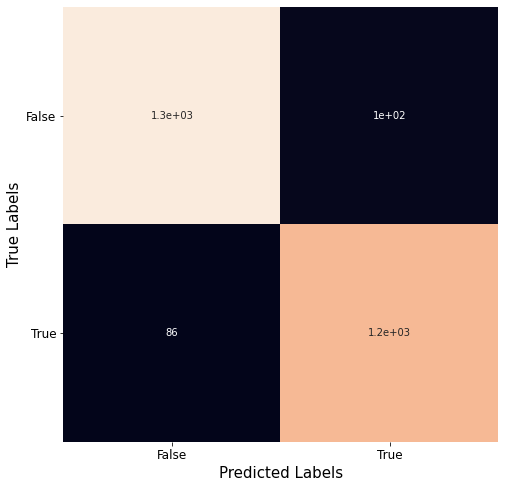

In [33]:
from sklearn.metrics import confusion_matrix

pred = cv["estimator"][0].predict(X_test_log)

cm = confusion_matrix(y_test_log, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)


ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)

# If our y values have labels to represent the them into confusion matrix we use that instead of above.
# Checking encoded labels

# categories = list(label_encoder.inverse_transform([0, 1]))
# categories
# ax.xaxis.set_ticklabels(categories, fontsize = 12)
# ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### 9. Import Decision Tree, define different hyperparamters and tune the algorithm.

In [37]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_1, y_1, test_size=0.33, random_state=123)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_clf, y_train_clf)
print("Accuracy of train of classification:",clf.score(X_train_clf, y_train_clf))
print("Accuracy of test of classification:",clf.score(X_test_clf, y_test_clf))



# Bias for training = 1-Bias for training
# Bias for test = 1-Bias for test
# Variance = test bias - training bias

print("Bias for training: ", (1 - clf.score(X_train_clf, y_train_clf)))
print("Bias for test: ", (1 - clf.score(X_test_clf, y_test_clf)))
print("Variance: ", (1 - clf.score(X_train_clf, y_train_clf)) - (1 - clf.score(X_test_clf, y_test_clf)))

Accuracy of train of classification: 0.9489728296885355
Accuracy of test of classification: 0.9583053127101546
Bias for training:  0.05102717031146453
Bias for test:  0.04169468728984538
Variance:  0.009332483021619153


### 10. Import Decision Tree, define different hyperparamters and tune the algorithm.

In [ ]:
#Visualization

import os
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X_1.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

### 11. Visualize feature importances.

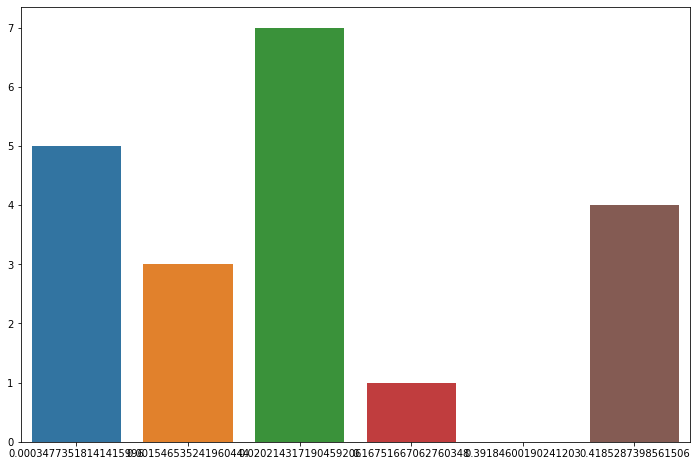

In [40]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X_1.columns)
plt.show()

### 12. Create confusion matrix and calculate accuracy, recall, precision and f1 score.

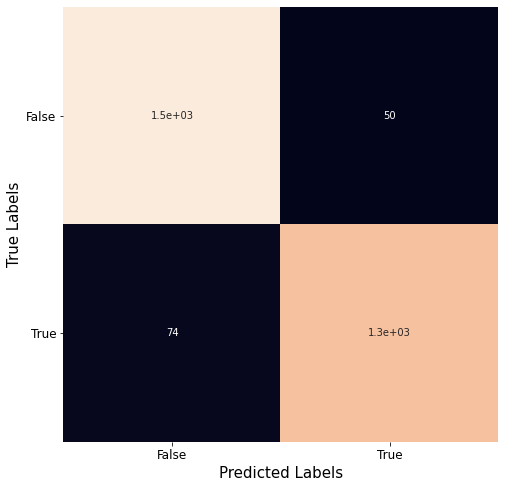

In [46]:
# Confusion Matrix
cm_1 = confusion_matrix(y_test_clf, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm_1, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [41]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test_clf)
print(classification_report(y_test_clf, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1555
           1       0.96      0.95      0.96      1419

    accuracy                           0.96      2974
   macro avg       0.96      0.96      0.96      2974
weighted avg       0.96      0.96      0.96      2974



In [42]:
# Metrics
print("Precision = {}".format(precision_score(y_test_clf, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_clf, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clf, pred)))
print("F1 Score = {}".format(f1_score(y_test_clf, pred,average='macro')))

Precision = 0.9586463007983366
Recall = 0.9578481290886884
Accuracy = 0.9583053127101546
F1 Score = 0.9581842814371937


### 13. Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [47]:
# Libraries required
import xgboost as xgb

In [48]:
xg_train = xgb.DMatrix(data=X_train_clf, label=y_train_clf)
xg_test = xgb.DMatrix(data=X_test_clf, label=y_test_clf)

In [49]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':2}

num_round = 5
model = xgb.train(param, xg_train, num_round)

In [51]:
preds = model.predict(xg_test)
preds[:15]

array([[0.02564361, 0.97435635],
       [0.04037163, 0.9596284 ],
       [0.00883484, 0.9911651 ],
       [0.99467635, 0.00532366],
       [0.9972361 , 0.00276401],
       [0.01250234, 0.9874977 ],
       [0.99635893, 0.00364104],
       [0.00598636, 0.9940136 ],
       [0.9972361 , 0.00276401],
       [0.00598636, 0.9940136 ],
       [0.9803929 , 0.01960716],
       [0.99635893, 0.00364104],
       [0.99467635, 0.00532366],
       [0.00598636, 0.9940136 ],
       [0.99635893, 0.00364104]], dtype=float32)

In [59]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
# Metrics
print("Precision = {}".format(precision_score(y_test_clf, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test_clf, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clf, best_preds)))

Precision = 0.9744823962355595
Recall = 0.9742991871908345
Accuracy = 0.9744451916610626


In [68]:
# Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

clf_1 = GridSearchCV(xgc, param_dict, cv=3, n_jobs = -1).fit(X_train_clf, y_train_clf)

print("Tuned: {}".format(clf_1.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_1.best_score_))
print("Train Score {:.6f}".format(clf_1.score(X_train_clf, y_train_clf)))
print("Test Score {:.6f}".format(clf_1.score(X_test_clf, y_test_clf)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_1.refit_time_))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Mean of the cv scores is 0.984095
Train Score 0.998840
Test Score 0.986886
Seconds used for refitting the best model on the train dataset: 1.334167


### 14. Visualize feature importances.

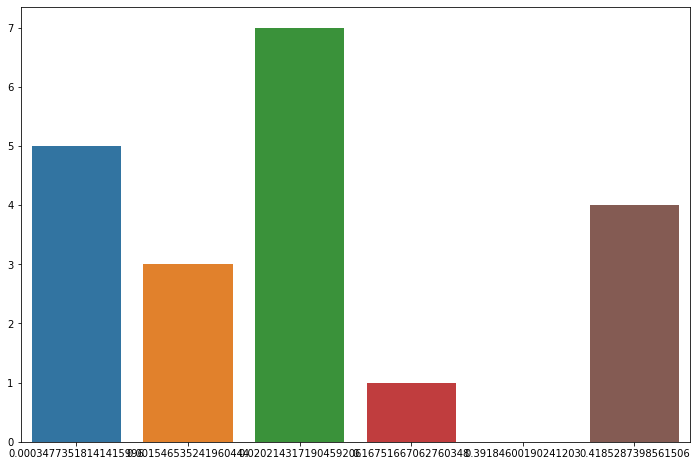

In [75]:
#Feature Importance
plt.figure(figsize=(12, 8))
# importance_1 = clf_1.feature_importances_
# Because of clf_1 is now "GridSearchCV" the code above can not using. Instead of this, the below can using.
importances_1 = clf_1.best_estimator_.feature_importances_
sns.barplot(x=importance_1, y=X_1.columns)
plt.show()

### 15. Create confusion matrix and calculate accuracy, recall, precision and f1 score. Evaluate your result and select best performing algorithm for our case.

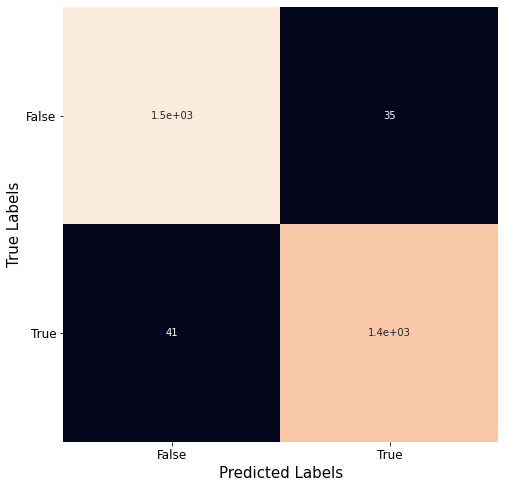

In [76]:
# Confusion matrix

plt.figure(figsize=(12, 8))
cm_2 = confusion_matrix(y_test_clf, best_preds)
ax = sns.heatmap(cm_2, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [77]:
# Metrics
print("Precision = {}".format(precision_score(y_test_clf, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_clf, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clf, pred)))
print("F1 Score = {}".format(f1_score(y_test_clf, pred,average='macro')))

Precision = 0.9586463007983366
Recall = 0.9578481290886884
Accuracy = 0.9583053127101546
F1 Score = 0.9581842814371937
